In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 로테이션

In [4]:
player_1819 = pd.read_csv('data/player/PL_player_1819.csv')
player_2324 = pd.read_csv('data/player/PL_player_2324.csv')
player_2425 = pd.read_csv('data/player/PL_player_2425.csv')

In [5]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Mins', ascending=False).head(5)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
128,Alisson Becker,26,Liverpool,32,GK,38,3420,0,0.0,28.3,...,0.0,0.0,0.1,0.0,0.0,0.0,0.8,0.0,0.0,0
4,Virgil van Dijk,26,Liverpool,33,D(C),38,3385,2,0.2,79.9,...,0.0,0.2,1.0,1.1,0.3,1.1,5.2,0.0,0.5,0
2,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",37(1),3262,8,1.8,28.4,...,3.1,2.9,0.6,0.1,0.7,0.0,0.1,0.3,0.0,0
32,Andy Robertson,26,Liverpool,31,"D(L),M(L)",36,3219,11,1.4,66.6,...,0.6,0.9,2.2,0.8,0.5,0.5,1.3,0.9,0.2,0
5,Sadio Mané,26,Liverpool,32,"AM(CLR),FW",35(1),3086,1,1.3,32.9,...,1.3,2.9,1.0,0.4,0.9,0.1,0.2,0.8,0.1,0


In [6]:
player_2324[player_2324['team_name'] == 'Liverpool'].sort_values(by='Mins', ascending=False).head(5)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
20,Virgil van Dijk,26,Liverpool,33,D(C),36,3178,2,0.3,79.8,...,0.1,0.2,1.1,1.1,0.6,0.5,3.9,0.1,0.9,0
31,Luis Díaz,26,Liverpool,28,"AM(LR),FW",32(5),2646,5,1.7,27.5,...,1.9,1.9,0.9,0.1,1.5,0.0,0.2,0.6,0.0,0
30,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",31(2),2612,5,1.4,58.4,...,1.1,0.9,3.0,1.1,1.6,0.0,0.8,2.0,0.2,0
15,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28(4),2536,10,2.1,29.2,...,1.8,2.4,0.5,0.1,0.4,0.0,0.0,0.5,0.0,0
170,Alisson Becker,26,Liverpool,32,GK,28,2520,0,0.0,35.6,...,0.0,0.1,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0


In [7]:
player_2425[player_2425['team_name'] == 'Liverpool'].sort_values(by='Mins', ascending=False).head(5)

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
19,19,Virgil van Dijk,26,Liverpool,33,D(C),28,2520,1,0.3,...,0.1,0.2,1.1,1.5,0.4,0.8,5.0,0.3,0.4,0
0,0,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28,2485,17,2.3,...,1.9,3.0,0.6,0.1,0.6,0.0,0.2,0.2,0.0,0
31,31,Ryan Gravenberch,26,Liverpool,22,DMC,28,2397,2,0.8,...,0.5,1.4,1.8,1.8,1.3,0.0,1.6,0.6,0.3,0
32,32,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",25(2),2075,3,1.2,...,0.7,0.8,2.8,0.7,1.9,0.0,0.9,1.4,0.2,0
16,16,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(2),2069,6,1.8,...,0.6,0.7,2.4,1.0,0.3,0.3,1.6,1.9,0.3,0


In [8]:
def plot_player_mins_hist_by_team(player_df, team_name, fixed_value):
    player_df = player_df[player_df['team_name'] == team_name]
    plt.figure(figsize=(10, 5))
    if fixed_value == 1:
        color = 'blue'
        title = f'Minutes Played Distribution for {team_name} Players'
    else:
        color = 'orange'
        title = f'Fixed Minutes Played Distribution for {team_name} Players'
        
    sns.histplot(player_df['Mins']*fixed_value, bins=20, color=color, alpha=0.5)
    plt.title(title)
    plt.xlabel('Minutes Played')
    plt.xlim(0, 4000)
    plt.yticks(np.arange(0, 3, 1))
    plt.ylabel('Number of Players')
    plt.grid()
    plt.show()

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


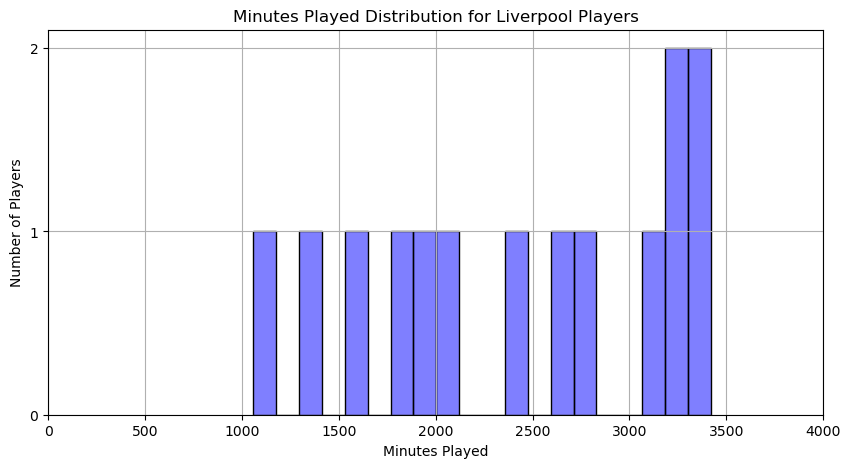

In [9]:
plot_player_mins_hist_by_team(player_1819, 'Liverpool', 1)

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


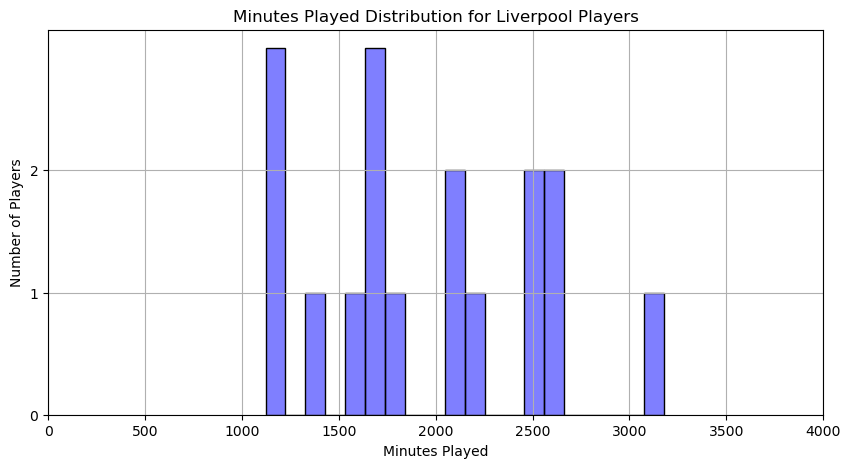

In [10]:
plot_player_mins_hist_by_team(player_2324, 'Liverpool', 1)

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


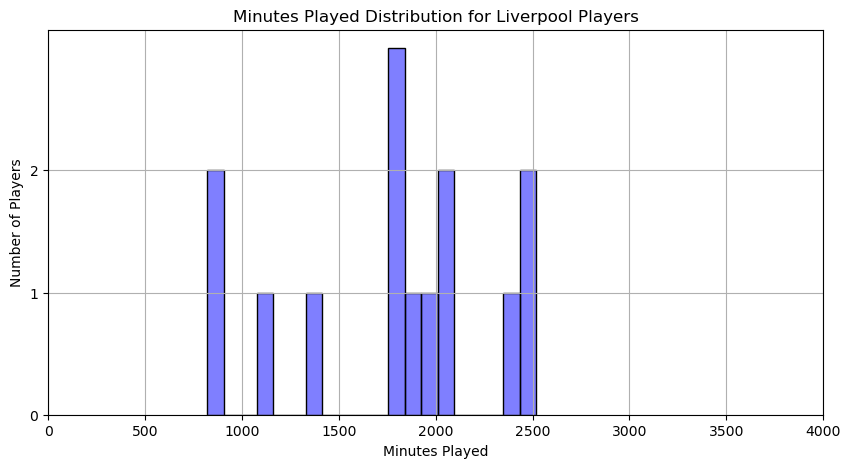

In [11]:
plot_player_mins_hist_by_team(player_2425, 'Liverpool', 1)

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


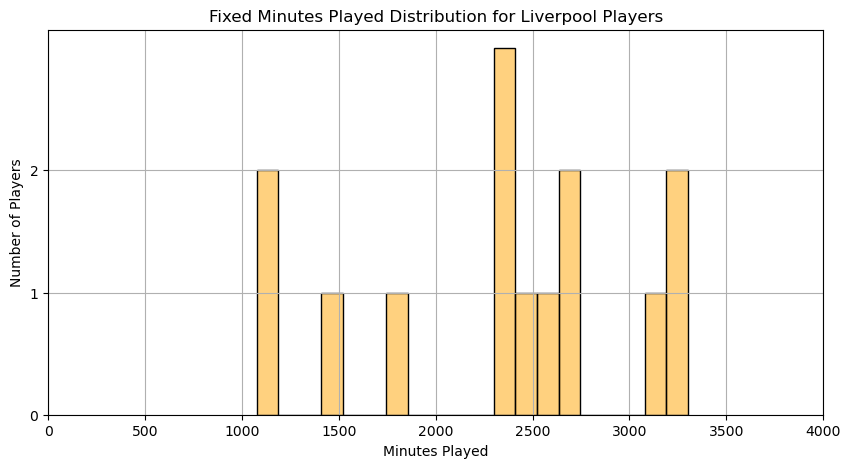

In [12]:
plot_player_mins_hist_by_team(player_2425, 'Liverpool', 38/29)

In [13]:
len(player_2425[player_2425['team_name'] == 'Liverpool'])

14

In [14]:
len(player_2324[player_2324['team_name'] == 'Liverpool'])

17

In [15]:
len(player_1819[player_1819['team_name'] == 'Liverpool'])

14

In [16]:
player_1819[player_1819['team_name'] == 'Liverpool']

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
2,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",37(1),3262,8,1.8,28.4,...,3.1,2.9,0.6,0.1,0.7,0.0,0.1,0.3,0.0,0
4,Virgil van Dijk,26,Liverpool,33,D(C),38,3385,2,0.2,79.9,...,0.0,0.2,1.0,1.1,0.3,1.1,5.2,0.0,0.5,0
5,Sadio Mané,26,Liverpool,32,"AM(CLR),FW",35(1),3086,1,1.3,32.9,...,1.3,2.9,1.0,0.4,0.9,0.1,0.2,0.8,0.1,0
7,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",27(2),2467,12,1.7,58.5,...,0.5,1.4,2.1,1.2,0.5,0.3,2.1,1.1,0.1,0
21,Roberto Firmino,26,Liverpool,33,"M(CLR),FW",31(3),2620,6,1.3,37.6,...,1.8,2.3,0.9,0.2,1.1,0.0,0.4,0.8,0.0,0
32,Andy Robertson,26,Liverpool,31,"D(L),M(L)",36,3219,11,1.4,66.6,...,0.6,0.9,2.2,0.8,0.5,0.5,1.3,0.9,0.2,0
36,Joël Matip,26,Liverpool,33,D(C),17(5),1535,0,0.1,61.0,...,0.0,0.3,1.8,1.5,0.5,0.8,3.5,0.5,0.3,0
76,Fabinho,26,Liverpool,31,"D(CR),DMC",21(7),2013,2,0.6,57.5,...,0.6,0.4,2.1,1.0,1.0,0.2,0.9,1.3,0.2,0
85,James Milner,26,Liverpool,39,"D(LR),M(CLR)",19(12),1787,4,1.4,45.2,...,0.3,1.0,1.4,0.6,0.9,0.2,0.7,0.8,0.2,0
95,Georginio Wijnaldum,26,Liverpool,34,M(CLR),32(3),2736,0,0.7,50.5,...,1.1,1.5,1.2,0.6,0.5,0.0,0.7,0.4,0.2,0


In [17]:
player_2324[player_2324['team_name']=='Liverpool']

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
15,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28(4),2536,10,2.1,29.2,...,1.8,2.4,0.5,0.1,0.4,0.0,0.0,0.5,0.0,0
20,Virgil van Dijk,26,Liverpool,33,D(C),36,3178,2,0.3,79.8,...,0.1,0.2,1.1,1.1,0.6,0.5,3.9,0.1,0.9,0
25,Andy Robertson,26,Liverpool,31,"D(L),M(L)",18(5),1693,2,2.7,54.1,...,0.3,0.8,1.5,0.6,0.4,0.2,1.5,0.7,0.3,0
26,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(3),2161,4,2.3,60.2,...,0.2,1.0,1.4,1.1,0.3,0.2,1.5,2.1,0.1,0
29,Diogo Jota,26,Liverpool,28,"AM(CLR),FW",14(7),1151,3,1.0,18.3,...,0.9,2.0,1.1,0.3,1.3,0.0,0.2,0.6,0.0,0
30,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",31(2),2612,5,1.4,58.4,...,1.1,0.9,3.0,1.1,1.6,0.0,0.8,2.0,0.2,0
31,Luis Díaz,26,Liverpool,28,"AM(LR),FW",32(5),2646,5,1.7,27.5,...,1.9,1.9,0.9,0.1,1.5,0.0,0.2,0.6,0.0,0
65,Darwin Núñez,26,Liverpool,25,"AM(CL),FW",22(14),2050,8,0.9,12.9,...,0.8,1.5,0.6,0.1,0.8,0.0,0.3,0.3,0.2,0
73,Cody Gakpo,26,Liverpool,25,"AM(CLR),FW",17(18),1646,5,0.7,15.3,...,0.9,1.3,0.8,0.4,0.8,0.0,0.2,0.5,0.1,0
86,Ibrahima Konaté,26,Liverpool,25,D(C),17(5),1571,0,0.4,65.9,...,0.2,0.4,1.6,0.9,1.1,0.8,2.3,0.3,0.5,0


In [18]:
player_2425[player_2425['team_name']=='Liverpool']

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,0,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28,2485,17,2.3,...,1.9,3.0,0.6,0.1,0.6,0.0,0.2,0.2,0.0,0
16,16,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(2),2069,6,1.8,...,0.6,0.7,2.4,1.0,0.3,0.3,1.6,1.9,0.3,0
18,18,Luis Díaz,26,Liverpool,28,"AM(LR),FW",21(6),1771,3,1.2,...,1.4,1.6,0.9,0.2,1.5,0.0,0.3,0.6,0.0,0
19,19,Virgil van Dijk,26,Liverpool,33,D(C),28,2520,1,0.3,...,0.1,0.2,1.1,1.5,0.4,0.8,5.0,0.3,0.4,0
31,31,Ryan Gravenberch,26,Liverpool,22,DMC,28,2397,2,0.8,...,0.5,1.4,1.8,1.8,1.3,0.0,1.6,0.6,0.3,0
32,32,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",25(2),2075,3,1.2,...,0.7,0.8,2.8,0.7,1.9,0.0,0.9,1.4,0.2,0
43,43,Dominik Szoboszlai,26,Liverpool,24,"AM(CLR),FW",21(5),1909,3,1.5,...,0.6,1.2,1.1,0.3,1.3,0.0,0.3,0.8,0.2,0
50,50,Ibrahima Konaté,26,Liverpool,25,D(C),21(1),1808,2,0.4,...,0.1,0.3,1.4,0.5,0.9,0.8,4.0,0.4,0.5,0
64,64,Cody Gakpo,26,Liverpool,25,"AM(CLR),FW",16(10),1412,3,1.2,...,0.6,1.2,0.9,0.3,0.5,0.1,0.5,0.3,0.1,0
105,105,Alisson Becker,26,Liverpool,32,GK,20,1789,0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.1,0.0,0


In [19]:
player_2324[player_2324['team_name'] == 'Liverpool'].sort_values(by='Mins', ascending=False).head(11)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
20,Virgil van Dijk,26,Liverpool,33,D(C),36,3178,2,0.3,79.8,...,0.1,0.2,1.1,1.1,0.6,0.5,3.9,0.1,0.9,0
31,Luis Díaz,26,Liverpool,28,"AM(LR),FW",32(5),2646,5,1.7,27.5,...,1.9,1.9,0.9,0.1,1.5,0.0,0.2,0.6,0.0,0
30,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",31(2),2612,5,1.4,58.4,...,1.1,0.9,3.0,1.1,1.6,0.0,0.8,2.0,0.2,0
15,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28(4),2536,10,2.1,29.2,...,1.8,2.4,0.5,0.1,0.4,0.0,0.0,0.5,0.0,0
170,Alisson Becker,26,Liverpool,32,GK,28,2520,0,0.0,35.6,...,0.0,0.1,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0
26,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(3),2161,4,2.3,60.2,...,0.2,1.0,1.4,1.1,0.3,0.2,1.5,2.1,0.1,0
98,Dominik Szoboszlai,26,Liverpool,24,"AM(CLR),FW",25(8),2110,2,1.7,42.4,...,0.8,0.8,1.0,0.5,0.9,0.0,0.4,1.0,0.1,0
65,Darwin Núñez,26,Liverpool,25,"AM(CL),FW",22(14),2050,8,0.9,12.9,...,0.8,1.5,0.6,0.1,0.8,0.0,0.3,0.3,0.2,0
194,Joe Gomez,26,Liverpool,27,D(CLR),17(15),1779,1,0.7,35.9,...,0.3,0.8,1.5,0.6,0.9,0.1,1.4,1.0,0.1,0
200,Wataru Endo,26,Liverpool,32,DMC,20(9),1723,0,0.6,45.0,...,0.8,0.9,1.7,0.7,1.7,0.0,1.0,1.4,0.1,0


In [20]:
pl1819 = pd.read_csv('data/match/PL1819_match.csv', index_col=0)
pl2324 = pd.read_csv('data/match/PL2324_match.csv', index_col=0)
pl2425 = pd.read_csv('data/match/PL2425_match.csv', index_col=0)

liv_1819 = pl1819[(pl1819['home'] == 'Liverpool') | (pl1819['away'] == 'Liverpool')]
liv_2324 = pl2324[(pl2324['home'] == 'Liverpool') | (pl2324['away'] == 'Liverpool')]
liv_2425 = pl2425[(pl2425['home'] == 'Liverpool') | (pl2425['away'] == 'Liverpool')]

In [21]:
liv_1819.columns

Index(['home_shot', 'away_shot', 'home_possession', 'away_possession',
       'home_pass_success', 'away_pass_success', 'home_dribbles',
       'away_dribbles', 'home_aerials_won', 'away_aerials_won', 'home_tackles',
       'away_tackles', 'home_corners', 'away_corners', 'home_dispossessed',
       'away_dispossessed', 'home_missing_player', 'away_missing_player',
       'home_missing_player_rating', 'away_missing_player_rating', 'home',
       'away', 'half_home_score', 'half_away_score', 'full_home_score',
       'full_away_score', 'kick_off', 'date', 'matchup_home_goals',
       'matchup_away_goals', 'matchup_home_wins', 'matchup_draw',
       'matchup_away_wins', 'home_total_att', 'away_total_att',
       'home_open_att', 'away_open_att', 'home_set_att', 'away_set_att',
       'home_counter_att', 'away_counter_att', 'home_pk_att', 'away_pk_att',
       'home_own_att', 'away_own_att', 'home_total_passes',
       'away_total_passes', 'home_crosses_passes', 'away_crosses_passes',
    

### 교체 선수 활용

#### 경기 별 평균 교체 시간(데이터 X)

#### 승점 쌓는 로그

In [22]:
liv_1819['date'] = pd.to_datetime(liv_1819['date'])
liv_2324['date'] = pd.to_datetime(liv_2324['date'])
liv_2425['date'] = pd.to_datetime(liv_2425['date'])

/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_43839/2213022.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  liv_1819['date'] = pd.to_datetime(liv_1819['date'])
/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_43839/2213022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_1819['date'] = pd.to_datetime(liv_1819['date'])
/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_43839/2213022.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

In [23]:
liv_1819_results = liv_1819[['date', 'home', 'away', 'half_home_score', 'half_away_score', 'full_home_score', 'full_away_score']].sort_values(by='date', ascending=True)
liv_2324_results = liv_2324[['date', 'home', 'away', 'half_home_score', 'half_away_score', 'full_home_score', 'full_away_score']].sort_values(by='date', ascending=True)
liv_2425_results = liv_2425[['date', 'home', 'away', 'half_home_score', 'half_away_score', 'full_home_score', 'full_away_score']].sort_values(by='date', ascending=True)

In [24]:
def liv_results_df(df):
    if df['home'] == 'Liverpool':
        df['full_liv_score'] = df['full_home_score']
        df['half_liv_score'] = df['half_home_score']
        df['half_other_score'] = df['half_away_score']
        df['full_other_score'] = df['full_away_score']
        if df['full_home_score'] > df['full_away_score']:
            df['winning_point'] = 3
        elif df['full_home_score'] == df['full_away_score']:
            df['winning_point'] = 1
        else:
            df['winning_point'] = 0
    else:
        df['full_liv_score'] = df['full_away_score']
        df['half_other_score'] = df['half_home_score']
        df['full_other_score'] = df['full_home_score']
        df['half_liv_score'] = df['half_away_score']
        if df['full_away_score'] > df['full_home_score']:
            df['winning_point'] = 3
        elif df['full_away_score'] == df['full_home_score']:
            df['winning_point'] = 1
        else:
            df['winning_point'] = 0
    
    return df    

In [25]:
liv_1819_results = liv_1819_results.apply(liv_results_df, axis=1)
liv_2324_results = liv_2324_results.apply(liv_results_df, axis=1)
liv_2425_results = liv_2425_results.apply(liv_results_df, axis=1)

In [26]:
liv_vs_mc_dict = {'date': pd.to_datetime('2024-03-11'), 'home': 'Liverpool', 'away': 'Manchester City', 
                  'half_home_score': 0, 'half_away_score': 1, 'full_home_score': 1, 'full_away_score': 1, 
                  'full_liv_score': 1, 'half_liv_score': 0, 'winning_point': 1}

In [27]:
liv_2324_results.loc[len(liv_2324_results)] = liv_vs_mc_dict

In [28]:
liv_2324_results.sort_values(by='date', ascending=True, inplace=True)

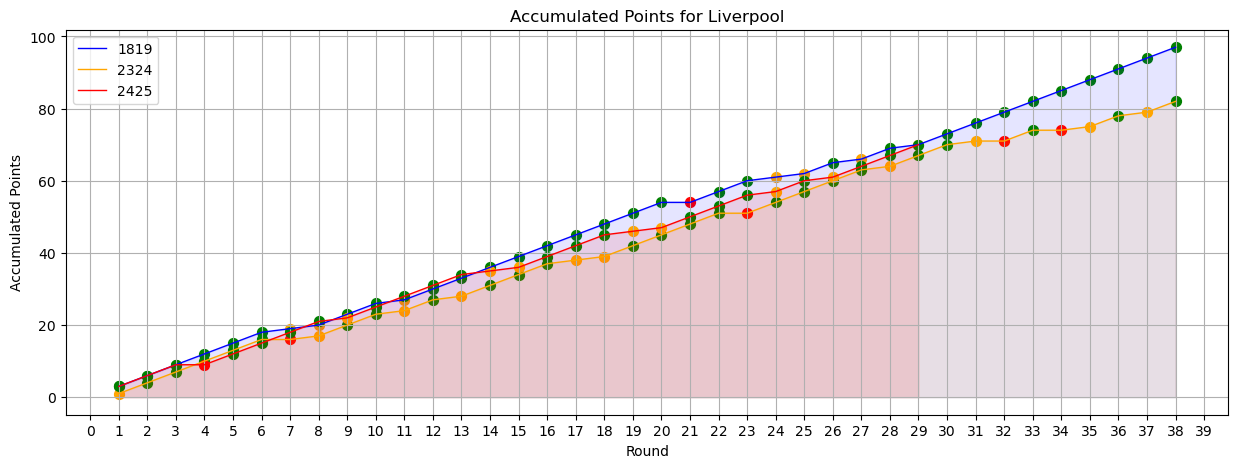

In [29]:
def plot_accumulated_points(df, color, label, fig=None, ax=None):  
    df['accumulated_points'] = df['winning_point'].cumsum()
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(15, 5))

    x_vals = np.arange(1, len(df) + 1)
    y_vals = df['accumulated_points']
    
    # 선 그래프
    ax.plot(x_vals, y_vals, color=color, linewidth=1, label=label)

    # 각 경기별 승/무/패 표시
    for i, point in enumerate(df['winning_point']):
        color_map = {3: 'green', 1: 'orange', 0: 'red'}
        ax.scatter(i + 1, y_vals.iloc[i], color=color_map.get(point, 'gray'), marker='o', s=50)

    # 영역 색칠
    ax.fill_between(x_vals, y_vals, color=color, alpha=0.1)
    
    # 축 설정
    ax.set_title('Accumulated Points for Liverpool')
    ax.set_xlabel('Round')
    ax.set_ylabel('Accumulated Points')
    ax.set_xticks(np.arange(0, 40, 1))
    ax.grid()
    ax.legend()

    return fig, ax

fig, ax = plot_accumulated_points(liv_1819_results, 'blue', '1819')
fig, ax = plot_accumulated_points(liv_2324_results, 'orange', '2324', fig=fig, ax=ax)
fig, ax = plot_accumulated_points(liv_2425_results, 'red', '2425', fig=fig, ax=ax)

In [30]:
print(liv_1819_results[liv_1819_results['home']=='Liverpool']['full_home_score'].sum()/19, 
      liv_1819_results[liv_1819_results['home']=='Liverpool']['full_away_score'].sum()/19,
      liv_1819_results[liv_1819_results['home']=='Liverpool']['winning_point'].sum()/19)

print(liv_1819_results[liv_1819_results['away']=='Liverpool']['full_away_score'].sum()/19,
      liv_1819_results[liv_1819_results['away']=='Liverpool']['full_home_score'].sum()/19,
      liv_1819_results[liv_1819_results['away']=='Liverpool']['winning_point'].sum()/19)

print(liv_2324_results[liv_2324_results['home']=='Liverpool']['full_home_score'].sum()/19, 
      liv_2324_results[liv_2324_results['home']=='Liverpool']['full_away_score'].sum()/19,
      liv_2324_results[liv_2324_results['home']=='Liverpool']['winning_point'].sum()/19)

print(liv_2324_results[liv_2324_results['away']=='Liverpool']['full_away_score'].sum()/19,
      liv_2324_results[liv_2324_results['away']=='Liverpool']['full_home_score'].sum()/19,
      liv_2324_results[liv_2324_results['away']=='Liverpool']['winning_point'].sum()/19)

print(liv_2425_results[liv_2425_results['home']=='Liverpool']['full_home_score'].sum()/14,
      liv_2425_results[liv_2425_results['home']=='Liverpool']['full_away_score'].sum()/14,
      liv_2425_results[liv_2425_results['home']=='Liverpool']['winning_point'].sum()/14)

print(liv_2425_results[liv_2425_results['away']=='Liverpool']['full_away_score'].sum()/15,
      liv_2425_results[liv_2425_results['away']=='Liverpool']['full_home_score'].sum()/15,
      liv_2425_results[liv_2425_results['away']=='Liverpool']['winning_point'].sum()/15)

2.8947368421052633 0.5263157894736842 2.789473684210526
1.7894736842105263 0.631578947368421 2.3157894736842106
2.5789473684210527 0.8947368421052632 2.526315789473684
1.9473684210526316 1.263157894736842 1.7894736842105263
2.2142857142857144 0.7857142857142857 2.5
2.533333333333333 1.0666666666666667 2.3333333333333335


In [31]:
len(liv_2425_results[liv_2425_results['away']=='Liverpool'])

15

#### 패스 타입

In [81]:
def pass_types(df, team_name):
    output_dict = {'total' : 0,
                  'crosses' : 0,
                  'long_balls' : 0,
                  'short_passes' : 0} 
    df = df[['home', 'away', 
                          'home_total_passes', 'away_total_passes', 
                          'home_crosses_passes', 'away_crosses_passes',
                          'home_long_balls', 'away_long_balls',
                          'home_short_passes', 'away_short_passes']]
    df = df[(df['home'] == team_name) | (df['away'] == team_name)]
    df = df.reset_index(drop=True)

    for i in range(len(df)):
        if df['home'][i] == team_name:
            output_dict['total'] += df['home_total_passes'][i]
            output_dict['crosses'] += df['home_crosses_passes'][i]
            output_dict['long_balls'] += df['home_long_balls'][i]
            output_dict['short_passes'] += df['home_short_passes'][i]
        else:
            output_dict['total'] += df['away_total_passes'][i]
            output_dict['crosses'] += df['away_crosses_passes'][i]
            output_dict['long_balls'] += df['away_long_balls'][i]
            output_dict['short_passes'] += df['away_short_passes'][i]
    return output_dict

def plot_pass_types(df, team_name):
    pass_types_dict = pass_types(df, team_name)
    total = pass_types_dict['total']
    cross = pass_types_dict['crosses']
    long = pass_types_dict['long_balls']
    short = pass_types_dict['short_passes']

    labels = ['Crosses', 'Long Balls', 'Short Passes']
    sizes = [cross, long, short]
    colors = ['gold', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0.1, 0.1)  

    plt.figure(figsize=(10, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
    plt.axis('equal')
    plt.show()

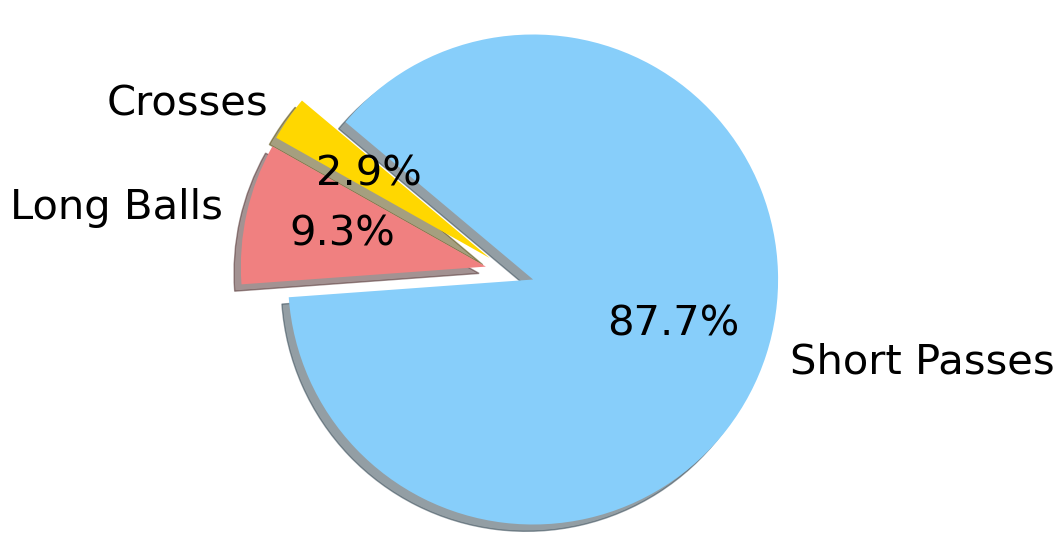

In [82]:
plot_pass_types(pl1819, 'Liverpool')

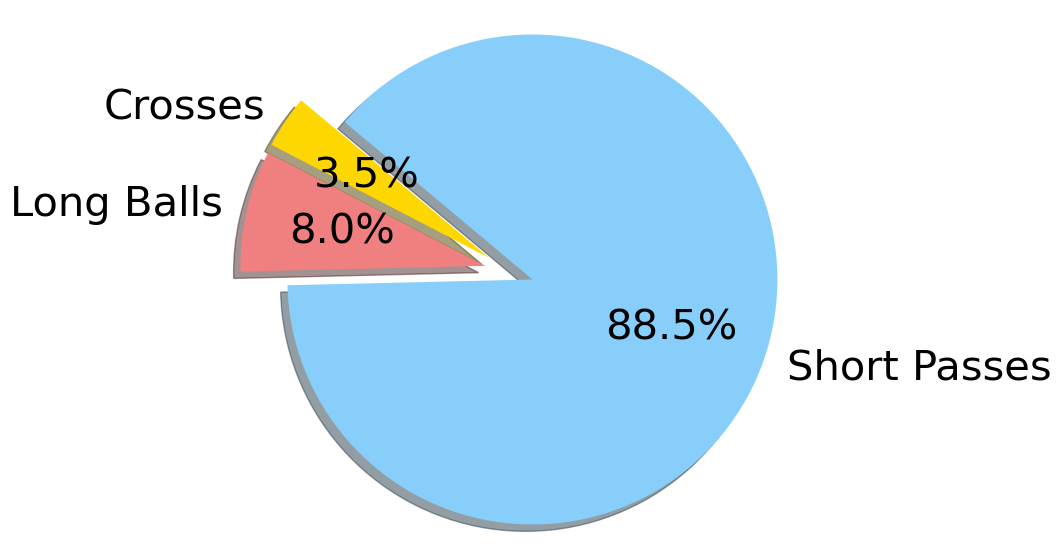

In [83]:
plot_pass_types(pl2324, 'Liverpool')

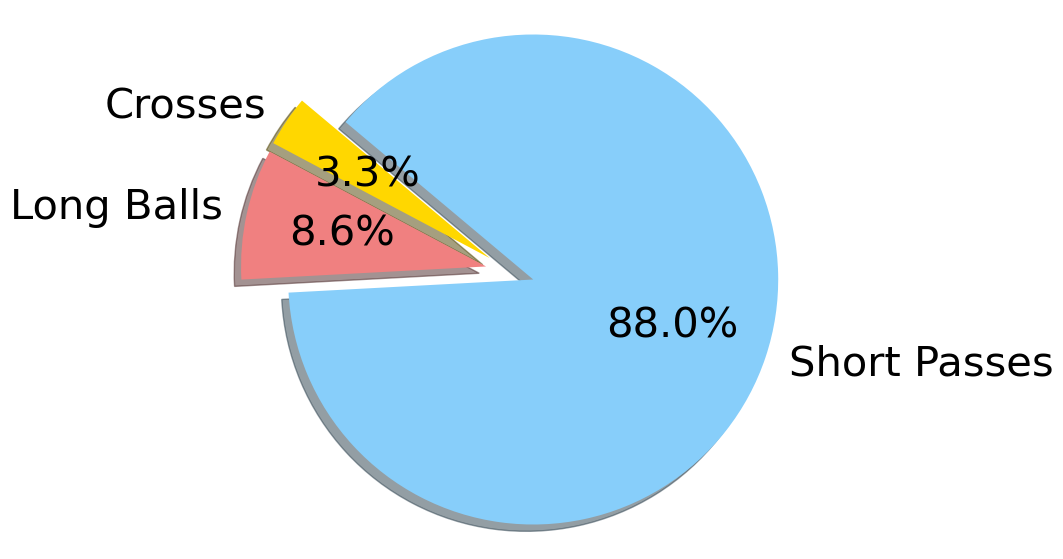

In [84]:
plot_pass_types(pl2425, 'Liverpool')

In [36]:
total_passes_1819 = pass_types(pl1819, 'Liverpool')['total']
total_passes_1819

24647

In [37]:
pass_types(pl1819, 'Liverpool')['total']/38

648.6052631578947

In [38]:
def plot_mean_passes_per_match(season1, season2, season3):
    seasons = [season1, season2, season3]
    means = []
    for season in seasons:
        mean_passes = pass_types(season, 'Liverpool')['total']/38
        means.append(mean_passes)

    means[2] = means[2] * (38/29)

    plt.figure(figsize=(10, 5))
    plt.bar(['1819', '2324', '2425'], means, color=['blue', 'orange', 'green'], 
            alpha=0.7)
    plt.title('Mean Passes per Match for Liverpool Players')
    plt.xlabel('Season')
    plt.ylabel('Mean Passes')
    plt.grid()
    plt.show()

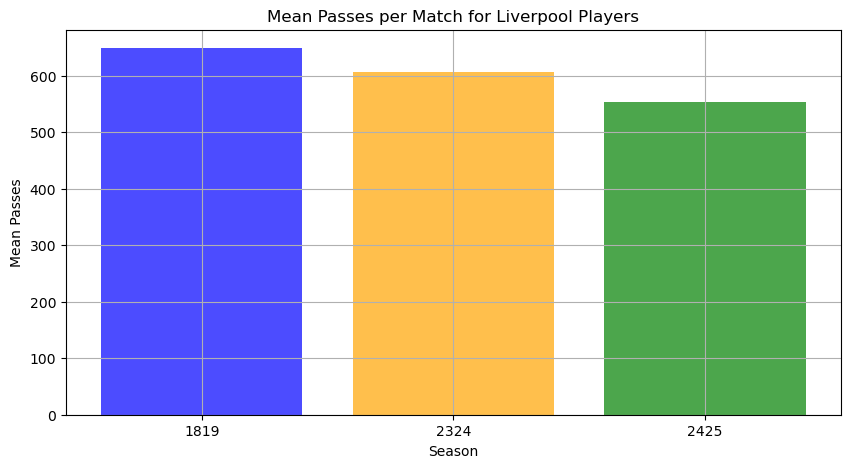

In [39]:
plot_mean_passes_per_match(pl1819, pl2324, pl2425)

In [40]:
team1819 = pd.read_csv('data/teams/PL1819_team.csv')
team2324 = pd.read_csv('data/teams/PL2324_team.csv')
team2425 = pd.read_csv('data/teams/PL2425_team.csv')

In [41]:
team1819['season'] = '1819'
team2324['season'] = '2324'
team2425['season'] = '2425'

all_teams = pd.concat([team1819, team2324, team2425], ignore_index=True)

In [42]:
liv_team = all_teams[all_teams['team_name'] == 'Liverpool']

In [43]:
liv_team.columns

Index(['team_name', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Goals',
       'Shots pg', 'Yellow', 'Red', 'Poss%', 'Pass%', 'A_Won', 'Rating',
       'Shoted pg', 'Tackles pg', 'Intercept pg', 'Fouls pg', 'Offsides pg',
       'Shots OT pg', 'Dribbles pg', 'Fouled pg', 'season'],
      dtype='object')

In [44]:
liv_team_stat = liv_team[['Shots pg', 'Shoted pg', 'Poss%', 'Pass%', 'A_Won', 'Fouls pg', 'Fouled pg', 'season']]

In [45]:
liv_team_stat.set_index('season', inplace=True)

In [46]:
liv_team_stat

,Shots pg,Shoted pg,Poss%,Pass%,A_Won,Fouls pg,Fouled pg
season,,,,,,,
1819,15.1,8.1,58.8,84.4,16.0,8.3,9.1
2324,20.8,10.9,61.3,85.8,15.6,12.2,9.9
2425,17.0,9.7,57.2,86.3,10.8,11.6,9.3


In [47]:
liv_team.columns

Index(['team_name', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Goals',
       'Shots pg', 'Yellow', 'Red', 'Poss%', 'Pass%', 'A_Won', 'Rating',
       'Shoted pg', 'Tackles pg', 'Intercept pg', 'Fouls pg', 'Offsides pg',
       'Shots OT pg', 'Dribbles pg', 'Fouled pg', 'season'],
      dtype='object')

In [114]:
liv_team[['GF', 'GA', 'GD', 'Goals', 'W', 'D', 'L', 'Pts', 'Poss%']]

,GF,GA,GD,Goals,W,D,L,Pts,Poss%
1,89,22,67,89,30,7,1,97,58.8
22,86,41,45,86,24,10,4,82,61.3
40,69,27,42,69,21,7,1,70,57.2


In [86]:
liv_team[[i for i in liv_team.columns if 'pg' in i]]

,Shots pg,Shoted pg,Tackles pg,Intercept pg,Fouls pg,Offsides pg,Shots OT pg,Dribbles pg,Fouled pg
1,15.1,8.1,16.1,8.3,8.3,2.0,5.9,9.4,9.1
22,20.8,10.9,17.8,7.7,12.2,2.6,7.3,8.7,9.9
40,17.0,9.7,17.4,8.1,11.6,1.4,6.3,8.3,9.3


In [49]:
t_df = liv_team[['GF', 'GA', 'Goals','Pts']]
t_df/np.array([38, 38, 29]).reshape(3, 1)

,GF,GA,Goals,Pts
1,2.342105,0.578947,2.342105,2.552632
22,2.263158,1.078947,2.263158,2.157895
40,2.379310,0.931034,2.379310,2.413793


In [50]:
len(liv_2324_results)

38

In [51]:
print('1819 half : {}, full : {}'.format(liv_1819_results['half_liv_score'].sum(), liv_1819_results['full_liv_score'].sum()))
print('2324 half : {}, full : {}'.format(liv_2324_results['half_liv_score'].sum(), liv_2324_results['full_liv_score'].sum()))
print('2425 half : {}, full : {}'.format(liv_2425_results['half_liv_score'].sum(), liv_2425_results['full_liv_score'].sum()))

1819 half : 38, full : 89
2324 half : 32, full : 86
2425 half : 31, full : 69


In [52]:
print('1819 half : {}, full : {}'.format(liv_1819_results['half_other_score'].sum(), liv_1819_results['full_other_score'].sum()))
print('2324 half : {}, full : {}'.format(liv_2324_results['half_other_score'].sum(), liv_2324_results['full_other_score'].sum()))
print('2425 half : {}, full : {}'.format(liv_2425_results['half_other_score'].sum(), liv_2425_results['full_other_score'].sum()))

1819 half : 10, full : 22
2324 half : 20.0, full : 40.0
2425 half : 13, full : 27


In [ ]:
## 슈팅분포 (total, openplay, counter, setpiece, penalty)
# 1819
# 575	402	24	142	7
# 2324
# 790	541	38	202	9
# 2425
# 523	366	56	92	9

In [90]:
liv_team['openplay'] = np.array([402, 541, 366])
liv_team['counter'] = np.array([24, 38, 56])
liv_team['setpiece'] = np.array([142, 202, 92])
liv_team['penalty'] = np.array([7, 9, 9])

/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_43839/3512348615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_team['openplay'] = np.array([402, 541, 366])
/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_43839/3512348615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_team['counter'] = np.array([24, 38, 56])
/var/folders/0n/d2rdhpkj2lq5h2j83266pz3r0000gn/T/ipykernel_43839/3512348615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [91]:
liv_team

,team_name,P,W,D,L,GF,GA,GD,Pts,Goals,...,Fouls pg,Offsides pg,Shots OT pg,Dribbles pg,Fouled pg,season,openplay,counter,setpiece,penalty
1,Liverpool,38,30,7,1,89,22,67,97,89,...,8.3,2.0,5.9,9.4,9.1,1819,402,24,142,7
22,Liverpool,38,24,10,4,86,41,45,82,86,...,12.2,2.6,7.3,8.7,9.9,2324,541,38,202,9
40,Liverpool,29,21,7,1,69,27,42,70,69,...,11.6,1.4,6.3,8.3,9.3,2425,366,56,92,9


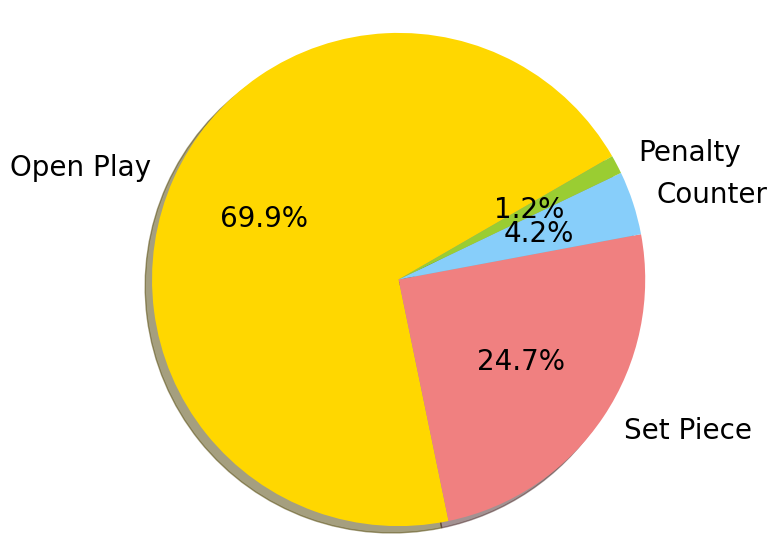

In [111]:
def plot_shot_distribution(df, season):
    labels = ['Open Play',  'Set Piece', 'Counter', 'Penalty']
    sizes = [df['openplay'].sum(), df['setpiece'].sum(), df['counter'].sum(), df['penalty'].sum()]
    colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen', 'lightpink']
    explode = (0, 0, 0, 0)  

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=30, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.show()

plot_shot_distribution(liv_team[liv_team['season'] == '1819'], '1819')

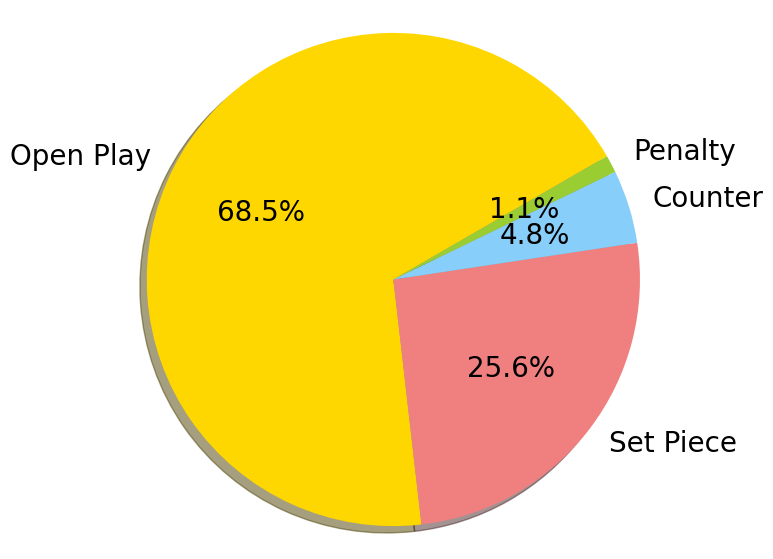

In [112]:
plot_shot_distribution(liv_team[liv_team['season'] == '2324'], '2324')

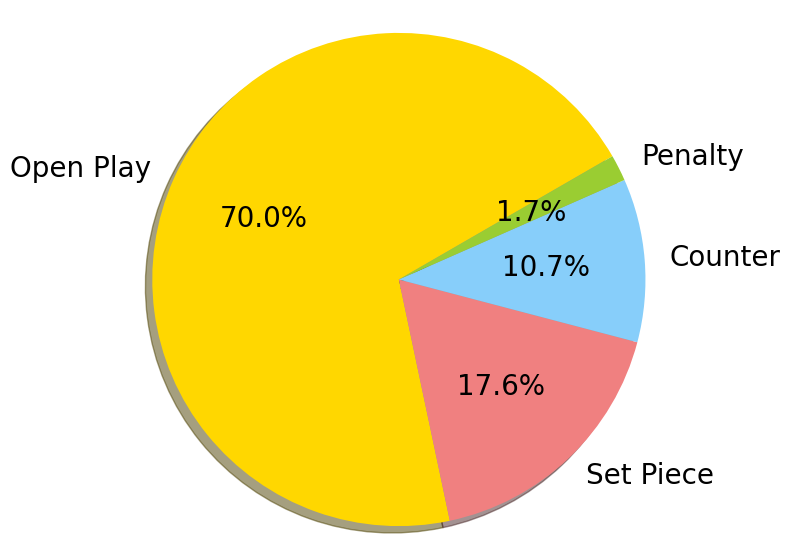

In [113]:
plot_shot_distribution(liv_team[liv_team['season'] == '2425'], '2425')

In [54]:
liv_team[['Yellow', 'Tackles pg', 'Intercept pg', 'Fouls pg']]

,Yellow,Tackles pg,Intercept pg,Fouls pg
1,37,16.1,8.3,8.3
22,65,17.8,7.7,12.2
40,54,17.4,8.1,11.6


### Player Stats

In [55]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Goals', ascending=False).head(5)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
2,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",37(1),3262,8,1.8,28.4,...,3.1,2.9,0.6,0.1,0.7,0.0,0.1,0.3,0.0,0
5,Sadio Mané,26,Liverpool,32,"AM(CLR),FW",35(1),3086,1,1.3,32.9,...,1.3,2.9,1.0,0.4,0.9,0.1,0.2,0.8,0.1,0
21,Roberto Firmino,26,Liverpool,33,"M(CLR),FW",31(3),2620,6,1.3,37.6,...,1.8,2.3,0.9,0.2,1.1,0.0,0.4,0.8,0.0,0
161,Xherdan Shaqiri,26,Liverpool,33,M(CLR),11(13),1059,3,0.8,26.6,...,0.8,1.0,0.6,0.3,0.4,0.0,0.3,0.4,0.0,0
85,James Milner,26,Liverpool,39,"D(LR),M(CLR)",19(12),1787,4,1.4,45.2,...,0.3,1.0,1.4,0.6,0.9,0.2,0.7,0.8,0.2,0


In [56]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Goals', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
2,Mohamed Salah,22,8,3262,7.57
5,Sadio Mané,22,1,3086,7.43
21,Roberto Firmino,12,6,2620,7.20
161,Xherdan Shaqiri,6,3,1059,6.71
85,James Milner,5,4,1787,6.91


In [57]:
player_2324[player_2324['team_name'] == 'Liverpool'].sort_values(by='Goals', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
15,Mohamed Salah,18,10,2536,7.24
65,Darwin Núñez,11,8,2050,6.89
29,Diogo Jota,10,3,1151,7.09
31,Luis Díaz,8,5,2646,7.09
73,Cody Gakpo,8,5,1646,6.87


In [58]:
player_2425[player_2425['team_name'] == 'Liverpool'].sort_values(by='Goals', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
0,Mohamed Salah,25,17,2485,7.89
18,Luis Díaz,9,3,1771,7.12
64,Cody Gakpo,8,3,1412,6.92
43,Dominik Szoboszlai,5,3,1909,6.99
117,Diogo Jota,5,3,821,6.76


In [59]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Assists', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
7,Trent Alexander-Arnold,1,12,2467,7.36
32,Andy Robertson,0,11,3219,7.12
2,Mohamed Salah,22,8,3262,7.57
21,Roberto Firmino,12,6,2620,7.20
85,James Milner,5,4,1787,6.91


In [60]:
player_2324[player_2324['team_name'] == 'Liverpool'].sort_values(by='Assists', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
15,Mohamed Salah,18,10,2536,7.24
65,Darwin Núñez,11,8,2050,6.89
150,Harvey Elliott,3,6,1339,6.70
30,Alexis Mac Allister,5,5,2612,7.09
31,Luis Díaz,8,5,2646,7.09


In [61]:
player_2425[player_2425['team_name'] == 'Liverpool'].sort_values(by='Assists', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
0,Mohamed Salah,25,17,2485,7.89
16,Trent Alexander-Arnold,2,6,2069,7.12
18,Luis Díaz,9,3,1771,7.12
32,Alexis Mac Allister,3,3,2075,7.04
43,Dominik Szoboszlai,5,3,1909,6.99


In [62]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Rating', ascending=False).head(5)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
2,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",37(1),3262,8,1.8,28.4,...,3.1,2.9,0.6,0.1,0.7,0.0,0.1,0.3,0.0,0
4,Virgil van Dijk,26,Liverpool,33,D(C),38,3385,2,0.2,79.9,...,0.0,0.2,1.0,1.1,0.3,1.1,5.2,0.0,0.5,0
5,Sadio Mané,26,Liverpool,32,"AM(CLR),FW",35(1),3086,1,1.3,32.9,...,1.3,2.9,1.0,0.4,0.9,0.1,0.2,0.8,0.1,0
7,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",27(2),2467,12,1.7,58.5,...,0.5,1.4,2.1,1.2,0.5,0.3,2.1,1.1,0.1,0
21,Roberto Firmino,26,Liverpool,33,"M(CLR),FW",31(3),2620,6,1.3,37.6,...,1.8,2.3,0.9,0.2,1.1,0.0,0.4,0.8,0.0,0


In [63]:
player_2324[player_2324['team_name'] == 'Liverpool'].sort_values(by='Rating', ascending=False).head(5)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
15,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28(4),2536,10,2.1,29.2,...,1.8,2.4,0.5,0.1,0.4,0.0,0.0,0.5,0.0,0
20,Virgil van Dijk,26,Liverpool,33,D(C),36,3178,2,0.3,79.8,...,0.1,0.2,1.1,1.1,0.6,0.5,3.9,0.1,0.9,0
25,Andy Robertson,26,Liverpool,31,"D(L),M(L)",18(5),1693,2,2.7,54.1,...,0.3,0.8,1.5,0.6,0.4,0.2,1.5,0.7,0.3,0
26,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(3),2161,4,2.3,60.2,...,0.2,1.0,1.4,1.1,0.3,0.2,1.5,2.1,0.1,0
29,Diogo Jota,26,Liverpool,28,"AM(CLR),FW",14(7),1151,3,1.0,18.3,...,0.9,2.0,1.1,0.3,1.3,0.0,0.2,0.6,0.0,0


In [64]:
player_2425[player_2425['team_name'] == 'Liverpool'].sort_values(by='Rating', ascending=False).head(5)

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,0,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28,2485,17,2.3,...,1.9,3.0,0.6,0.1,0.6,0.0,0.2,0.2,0.0,0
16,16,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(2),2069,6,1.8,...,0.6,0.7,2.4,1.0,0.3,0.3,1.6,1.9,0.3,0
18,18,Luis Díaz,26,Liverpool,28,"AM(LR),FW",21(6),1771,3,1.2,...,1.4,1.6,0.9,0.2,1.5,0.0,0.3,0.6,0.0,0
19,19,Virgil van Dijk,26,Liverpool,33,D(C),28,2520,1,0.3,...,0.1,0.2,1.1,1.5,0.4,0.8,5.0,0.3,0.4,0
31,31,Ryan Gravenberch,26,Liverpool,22,DMC,28,2397,2,0.8,...,0.5,1.4,1.8,1.8,1.3,0.0,1.6,0.6,0.3,0


#### 선수들의 stat 변화

In [65]:
player_1819[player_1819['team_name'] == 'Liverpool'].sort_values(by='Rating', ascending=False).head(5)[['player_name', 'Goals', 'Assists', 'Mins', 'Rating']]

,player_name,Goals,Assists,Mins,Rating
2,Mohamed Salah,22,8,3262,7.57
4,Virgil van Dijk,4,2,3385,7.44
5,Sadio Mané,22,1,3086,7.43
7,Trent Alexander-Arnold,1,12,2467,7.36
21,Roberto Firmino,12,6,2620,7.20


In [66]:
def df_player_stat(season1, season2, player_name, columns):
    t_df = pd.concat([
        season1[(season1['team_name'] == 'Liverpool') & (season1['player_name'] == player_name)],
        season2[(season2['team_name'] == 'Liverpool') & (season2['player_name'] == player_name)]
        ])
    t_df = t_df[columns]
    if 'Goals' in columns:
        t_df['GoalP'] = np.round(t_df['Goals'] / t_df['Mins'] * 90, 2)
    if 'Assists' in columns:
        t_df['AssistsP'] = np.round(t_df['Assists'] / t_df['Mins'] * 90, 2)
    t_df = t_df.T
    t_df.columns = ['2324', '2425']
    
    t_df['Diff'] = t_df.apply(lambda row: row['2425'] - row['2324']
                    if isinstance(row['2425'], (int, float)) and isinstance(row['2324'], (int, float))
                    else np.nan,
                    axis=1)
    return t_df

In [67]:
player_2324.columns

Index(['player_name', 'team_number', 'team_name', 'age', 'position', 'Apps',
       'Mins', 'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB',
       'Rating', 'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble',
       'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls',
       'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG'],
      dtype='object')

In [68]:
att_stats = ['Apps', 'Mins', 'Goals', 'Assists', 'Rating', 'KeyP', 'AvgP', 'PS%','Crosses', 'ThrB', 'SpG', 'AerialsWon','Dribble', 'Fouled']

In [69]:
def_stats = ['Apps', 'Mins', 'Goals', 'Assists', 'Rating', 'KeyP', 'AvgP', 'PS%','Crosses', 'ThrB', 'AerialsWon','Tackles', 'Inter', 'Fouls', 'Clear', 'Blocks']

In [70]:
all_stats = list(set(att_stats + def_stats))

In [71]:
player_2425[player_2425['team_name'] == 'Liverpool'].sort_values(by='Rating', ascending=False).head(10)

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,0,Mohamed Salah,26,Liverpool,32,"AM(CLR),FW",28,2485,17,2.3,...,1.9,3.0,0.6,0.1,0.6,0.0,0.2,0.2,0.0,0
16,16,Trent Alexander-Arnold,26,Liverpool,26,"D(R),DMC,M(R)",25(2),2069,6,1.8,...,0.6,0.7,2.4,1.0,0.3,0.3,1.6,1.9,0.3,0
18,18,Luis Díaz,26,Liverpool,28,"AM(LR),FW",21(6),1771,3,1.2,...,1.4,1.6,0.9,0.2,1.5,0.0,0.3,0.6,0.0,0
19,19,Virgil van Dijk,26,Liverpool,33,D(C),28,2520,1,0.3,...,0.1,0.2,1.1,1.5,0.4,0.8,5.0,0.3,0.4,0
31,31,Ryan Gravenberch,26,Liverpool,22,DMC,28,2397,2,0.8,...,0.5,1.4,1.8,1.8,1.3,0.0,1.6,0.6,0.3,0
32,32,Alexis Mac Allister,26,Liverpool,26,"M(CL),FW",25(2),2075,3,1.2,...,0.7,0.8,2.8,0.7,1.9,0.0,0.9,1.4,0.2,0
43,43,Dominik Szoboszlai,26,Liverpool,24,"AM(CLR),FW",21(5),1909,3,1.5,...,0.6,1.2,1.1,0.3,1.3,0.0,0.3,0.8,0.2,0
50,50,Ibrahima Konaté,26,Liverpool,25,D(C),21(1),1808,2,0.4,...,0.1,0.3,1.4,0.5,0.9,0.8,4.0,0.4,0.5,0
64,64,Cody Gakpo,26,Liverpool,25,"AM(CLR),FW",16(10),1412,3,1.2,...,0.6,1.2,0.9,0.3,0.5,0.1,0.5,0.3,0.1,0
105,105,Alisson Becker,26,Liverpool,32,GK,20,1789,0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.1,0.0,0


In [72]:
df_player_stat(player_2324, player_2425, 'Mohamed Salah', att_stats)

,2324,2425,Diff
Apps,28(4),28,NaN
Mins,2536,2485,-51.00
Goals,18,25,7.00
Assists,10,17,7.00
Rating,7.24,7.89,0.65
KeyP,2.1,2.3,0.20
AvgP,29.2,30.1,0.90
PS%,75.7,73.7,-2.00
Crosses,0.3,0.5,0.20
ThrB,0.3,0.2,-0.10


In [73]:
df_player_stat(player_2324, player_2425, 'Trent Alexander-Arnold', def_stats)

,2324,2425,Diff
Apps,25(3),25(2),NaN
Mins,2161,2069,-92.00
Goals,3,2,-1.00
Assists,4,6,2.00
Rating,7.12,7.12,0.00
KeyP,2.3,1.8,-0.50
AvgP,60.2,50.9,-9.30
PS%,79.6,77.5,-2.10
Crosses,2.0,1.3,-0.70
ThrB,0.3,0.2,-0.10


In [74]:
df_player_stat(player_2324, player_2425, 'Virgil van Dijk', def_stats)

,2324,2425,Diff
Apps,36,28,NaN
Mins,3178,2520,-658.00
Goals,2,1,-1.00
Assists,2,1,-1.00
Rating,7.15,7.1,-0.05
KeyP,0.3,0.3,0.00
AvgP,79.8,77.1,-2.70
PS%,91.5,91.6,0.10
Crosses,0.0,0.0,0.00
ThrB,0.0,0.0,0.00


In [75]:
df_player_stat(player_2324, player_2425, 'Alexis Mac Allister', all_stats)

,2324,2425,Diff
Inter,1.1,0.7,-0.40
Crosses,0.3,0.3,0.00
PS%,87.8,87.5,-0.30
ThrB,0.2,0.1,-0.10
Apps,31(2),25(2),NaN
KeyP,1.4,1.2,-0.20
AerialsWon,0.9,0.6,-0.30
SpG,1.3,1.1,-0.20
Clear,0.8,0.9,0.10
Goals,5,3,-2.00


In [76]:
df_player_stat(player_2324, player_2425, 'Ryan Gravenberch', all_stats)

,2324,2425,Diff
Inter,0.5,1.8,1.30
Crosses,0.0,0.1,0.10
PS%,83.4,89.1,5.70
ThrB,0.1,0.2,0.10
Apps,12(14),28,NaN
KeyP,0.6,0.8,0.20
AerialsWon,0.4,0.6,0.20
SpG,0.9,0.5,-0.40
Clear,0.4,1.6,1.20
Goals,1,0,-1.00
